# Visualizing Linear Regression 

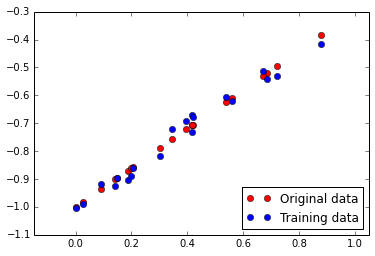

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

np.random.seed(1)
def f(x, a, b):
    n    = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax  = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n    = 20
noise_var = 0.001
train_X   = np.random.random((1, n))
ref_Y     = f(train_X, Wref, bref)
train_Y   = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)
n_samples = train_X.size 

# Plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [2]:
# Parameters 
training_epochs = 1000
display_step    = 100

# Set TensorFlow Graph
x = tf.placeholder(tf.float32, name="INPUT_x")
y = tf.placeholder(tf.float32, name="OUTPUT_y")
W = tf.Variable(np.random.randn(), name="WEIGHT_W")
b = tf.Variable(np.random.randn(), name="BIAS_b")

# Construct a Model
activation = tf.add(tf.mul(x, W), b)

# Define Error Measure and Optimizer
learning_rate   = 0.01
cost = tf.reduce_mean(tf.pow(activation-y, 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# Initializer
init = tf.initialize_all_variables()

# Run! 
sess = tf.Session()
# Initialize
sess.run(init)
# Summary
summary_writer = tf.train.SummaryWriter('/tmp/tf_logs/linear_regression', graph=sess.graph)
for epoch in range(training_epochs):
    for (_x, _y) in zip(train_X[0, :], train_Y[0, :]):
        # print "x: ", x, " y: ", y
        sess.run(optimizer, feed_dict={x:_x, y:_y})
    
    # Check cost
    if epoch % display_step == 0:
        costval = sess.run(cost, feed_dict={x: train_X, y:train_Y})
        print("[%d/%d] cost :%.3f" % (epoch, training_epochs, costval)),
        Wtemp = sess.run(W)
        btemp = sess.run(b)
        print("Wtemp is %.3f and Wref is %.3f" % (Wtemp, Wref)),
        print("btemp is %.3f and bref is %.3f" % (btemp, bref))
        
# Final W and b
Wopt = sess.run(W)
bopt = sess.run(b)
fopt = f(train_X, Wopt, bopt)

[0/1000] cost :0.215 Wtemp is -0.696 and Wref is 0.700 btemp is -0.172 and bref is -1.000
[100/1000] cost :0.003 Wtemp is 0.505 and Wref is 0.700 btemp is -0.928 and bref is -1.000
[200/1000] cost :0.001 Wtemp is 0.667 and Wref is 0.700 btemp is -0.992 and bref is -1.000
[300/1000] cost :0.001 Wtemp is 0.688 and Wref is 0.700 btemp is -1.000 and bref is -1.000
[400/1000] cost :0.001 Wtemp is 0.690 and Wref is 0.700 btemp is -1.001 and bref is -1.000
[500/1000] cost :0.001 Wtemp is 0.690 and Wref is 0.700 btemp is -1.001 and bref is -1.000
[600/1000] cost :0.001 Wtemp is 0.691 and Wref is 0.700 btemp is -1.001 and bref is -1.000
[700/1000] cost :0.001 Wtemp is 0.691 and Wref is 0.700 btemp is -1.001 and bref is -1.000
[800/1000] cost :0.001 Wtemp is 0.691 and Wref is 0.700 btemp is -1.001 and bref is -1.000
[900/1000] cost :0.001 Wtemp is 0.691 and Wref is 0.700 btemp is -1.001 and bref is -1.000


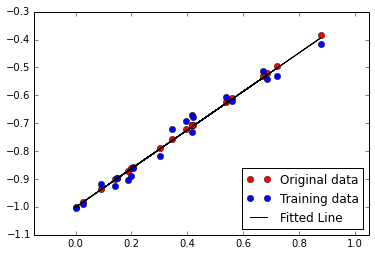

In [3]:
# Plot Results
plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], fopt[0, :], 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend(loc='lower right')

### Run the command line
##### tensorboard --logdir=/tmp/tf_logs/linear_regression
### Open http://localhost:6006/ into your web browser

<img src="images/tsboard/linear_regression.png">